# Условие задачи

Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:

$$\left\{\begin{aligned}
\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x}  = 1-e^{t+u},\ ~ -1 \leq x < 0\\
u(x,0)= \ln \frac{2}{2x+1} \\
u(0,t) = \ln \frac{2}{e^t-2te^{-t}} \\ 
\end{aligned}\\
\right. $$

# Аналитическое решение

$$\frac{dt}{1} = \frac{dx}{1} = \frac{du}{1-e^{t+u}}$$
Из первого равенства видим, что  $t - t^* = x - x^*$.

$t-x = C$, где $C$ произвольно -- это семейство характеристик для данной задачи. Вне зависимости от начальных и граничных условий характеристики никогда не пересекаются. Это значит, что через каждую точку $(x,t)$ из первого квадранта прозодит одна и только одна характеристика $\Rightarrow$ решение всюду определено и единственно. Построим это семейство характеристик.

Нам понадобятся несколько библиотек для решения данной задачи.

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

Сгенерируем массивы диапазонов для $x$ и $t$, затем построим их в зависимости от параметра $C$.

In [3]:
def ch(x):
    return [x+C for C in np.arange(0,2,0.2)]

x_list = np.arange(-1,0.1,0.1)
ch_list = [ch(x) for x in x_list]
plt.subplot(1, 1, 1)

plt.plot(x_list, ch_list) 
plt.title('Характеристики',loc='right')
plt.ylabel('t')
plt.xlabel('x')


plt.show()

<IPython.core.display.Javascript object>

Сделаем замену $u = \ln V + t$. Тогда в уравнении поменяются следующие слагаемые: $$\frac{\partial u}{\partial t} = \frac {V_t}{V} + 1, $$ $$ \frac{\partial u}{\partial x} = \frac {V_x}{V},$$ $$e^{t+u} = Ve^{2t}.$$
Если сократить единицы в обеих частях, а затем поделить уравнение на $-V$, то оно придёт к виду $$-\frac{V_t}{V^2}-\frac{V_x}{V^2}=e^{2t}$$
Затем сделаем замену $F = \frac{1}{V}:$ $$\frac{\partial F}{\partial t} = -\frac {V_t}{V^2}, $$ $$\frac{\partial F}{\partial x} = -\frac {V_x}{V^2}, $$ $$\frac{\partial F}{\partial t} + \frac{\partial F}{\partial x} = e^{2t}$$

Также начальное и граничное условия: $$u(x, 0) = \ln V + \not t \Rightarrow V(x, 0) = \frac{2}{2x+1} \Rightarrow F(x,0) = \frac{2x+1}{2}$$ 
$$u(0, t) = \ln V + t \Rightarrow V(0, t) = \frac{2}{e^{2t} - 2t} \Rightarrow F(0, t) = \frac{e^{2t} - 2t}{2}$$ 

Задача теперь выглядит следующим образом:

$$\left\{\begin{aligned} 
\frac{\partial F}{\partial t} + \frac{\partial F}{\partial x} = e^{2t}\\
F(x, 0) = \frac{2x+1}{2}\\
F(0, t) = \frac{e^{2t}-2t}{2}
\end{aligned}\\
\right. $$

Так как $dt=dx$, можно считать, что $\frac{\partial F}{\partial x} + \frac{\partial F}{\partial t} = \frac{dF}{dt}$. Уравнение для характеристик у нас есть: $t-x=C$. Задачу с заменой переменных, а также граничными и начальными условиями можно записать так:

$$\left\{\begin{aligned} 
\frac{dF}{dt}= e^{2t}\\
F\vert_{t=0} = \frac{-2C+1}{2}\\
F\vert_{t=C} = \frac{e^{2t}-2t}{2}
\end{aligned}\\
\right. $$
Интегрируем первое уравнение по t, получаем $F = \frac{e^{2t}}{2}+A(C)$. Подставляем начальные условия: $F\vert_{t=0}=\frac{1}{2}+A(C) = \frac{1-2C}{2}$. Подставляем граничные условия: $F\vert_{t=C} = \frac{e^{2C}}{2}-C$. Начальные и граничные условия согласуются и дают $A(C)=-C=x-t$. Следовательно, $F = \frac{e^{2t}}{2}+x-t$. 
Стоит вернуться к изначальным координатам: $$u = -\ln F + t \Rightarrow u = 2t - \ln 2 + \ln (x-t) + t = 3t + \ln \frac{x-t}{2}$$ 


# Разностная сетка
Теперь, когда мы знаем Введём на рассматриваемой области $\Omega$ сетку по времени и координате с соответствующими шагами $\tau$ и $h$.
\begin{eqnarray}
\omega_{h, ~ \tau}=\begin{cases}
x_n=n\cdot h, ~h=\frac{1}{N}, ~n=\overline{0, N}\\
t_m=m\cdot \tau, ~\tau=\frac{1}{M}, ~m=\overline{0, M}
\end{cases}
\end{eqnarray}

На сетке $\omega_{h, ~\tau}$ будем рассматривать функцию $u(x_n, t_m)$.
Можно использовать схему "уголок". Разностный оператор $L_{h\tau}$ для этой схемы имеет вид: $$L_{h\tau}u = \frac{1}{\tau}\left( u^{m+1}_{n+1} - u^{m}_{n+1}\right)+\frac{1}{h}\left(c^{m+1}_{n+1} u^{m+1}_{n+1} - c^{m+1}_{n} u^{m+1}_{n}\right)=f^{m+1}_{n+1},$$ аппроксимирует $Lu$ в точке $(x_n, t_m)$ с точностью $O(h+\tau)$ и имеет безусловную устойчивость. Для конкретной задачи $c = 1$, и уравнение изначально находится в дивергентном виде, однако с помощью замены переменных её можно упростить.



Разностная схема к этой задаче выглядит так:

$$\left\{\begin{aligned} 
\frac{1}{\tau}\left( y^{m+1}_{n+1} - y^{m}_{n+1}\right)+\frac{1}{h}\left(y^{m+1}_{n+1} - y^{m+1}_{n}\right)=e^{2t_{m+1}}, ~m=\overline{0, M-1}, ~n=\overline{0, N}\\
y^0_n= \frac{2nh+1}{2}, ~n=\overline{0, N}\\
y^{m}_0 = \frac{e^{2mt}-2mt}{2},  ~m=\overline{0, M}
\end{aligned}\\
\right. $$


Можно в общих чертах описать метод Ньютона:

1) Задаётся приближённое значение $x_0$, где $f(x_0) = 0$

2) Для каждого нового приближения $0 = f(x_{n+1}) = f(x_n+\Delta x_n) \approx f(x_n) + \frac{\Delta x_n}{f(x_n)} f'(x_n)+\dots$

Метод Ньютона для этой задачи: $$f(y^{m+1}_{n+1}) = \frac{y^{m+1}_{n+1} - y^{m}_{n+1}}{\tau} + \frac{y^{m+1}_{n+1}-y^{m+1}_{n}}{h} - e^{2(m+1)\tau}$$
$$f'(y^{m+1}_{n+1}) = \frac{1}{\tau}+\frac{1}{h}$$

In [239]:
epsilon = 0.001 #эпсилон для метода Ньютона
N = 10; M = 10 #количество точек
T_begin = 0; T_end = 2 #границы по времени
X_begin = 0; X_end = 1 #границы по координате
global h
global t
h=(X_end - X_begin)/(N-1)
t=(T_end - T_begin)/(M-1) #элементарные шаги по пространству и времени

y = np.zeros((M, N)) #двумерный массив MxN, заполненный нулями
y_an = np.zeros((M, N)) #массив для аналитического решения

for n in np.arange(N): #заполняем граничными условиями
        y[0][n] = (2*n*h+1)/2
        for m in np.arange(M): 
            y_an[m][n] = np.exp(2*m*t)/2+n*h-m*t

for m in np.arange(M): #заполняем начальными условиями
        y[m][0] = (np.exp(2*m*t)-2*m*t)/2

#введём вспомогательные функции для метода Ньютона:
def F(m, n):
    return (y[m][n] - y[m-1][n])/t + (y[m][n]-y[m][n-1])/h - np.exp(2*m*t)
def dF(m, n):
    return 1/t+1/h


In [240]:

eps = epsilon + 1; # > epsilon
while eps > epsilon:
    eps = 0
    for m in np.arange(M)[0:M-1]:
        for n in np.arange(N)[0:N-1]:
            ep = F(m+1, n+1) / dF( m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - ep
            if abs(ep) > eps:
                eps = abs(ep)  

In [241]:
u = np.zeros((M, N))
u_an = np.zeros((M, N))
for m in np.arange(M):
    for n in np.arange(N):
        u[m][n] = -np.log(y[m][n])+m*t #здесь переводим функцию обратно к оригиналу
        u_an[m][n] = -np.log(y_an[m][n])+m*t

<IPython.core.display.Javascript object>


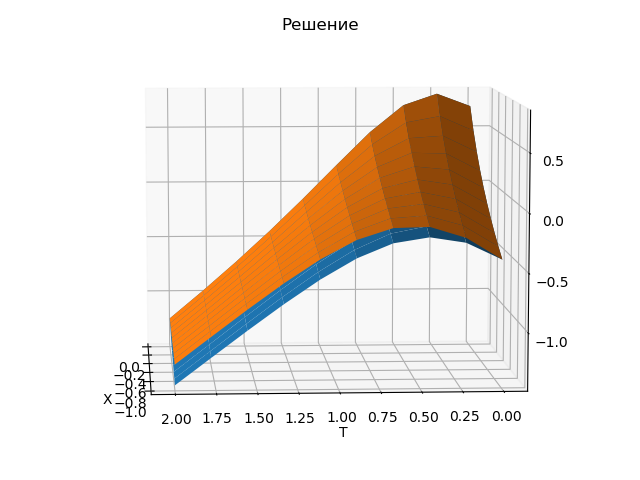

In [242]:
tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, -X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(X, T, u, label = 'Численное решение')
axes.plot_surface(X, T, u_an, label = 'Аналитическое решение')
plt.title('Решение')
plt.xlabel('X')
plt.ylabel('T')
pylab.show()


<IPython.core.display.Javascript object>


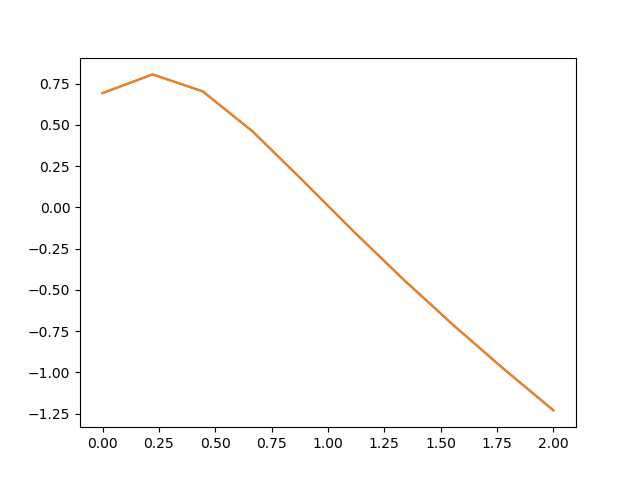

In [142]:
tm = np.linspace(T_begin,T_end, num=M) # это дебаговая ячейка для проверки соответствия начальных и граничных условий
xn = np.linspace(X_begin, X_end, num=N)
fig = plt.figure()
plt.subplot(1, 1, 1)
plt.plot(tm, u.T[0])
plt.plot(tm, u_an.T[0])
plt.show()

<IPython.core.display.Javascript object>


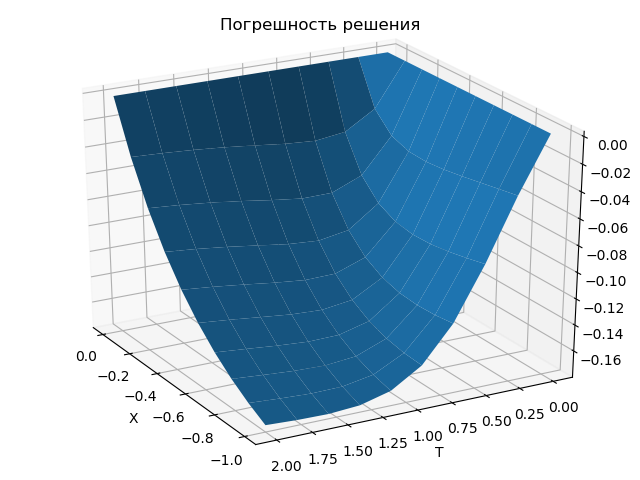

In [234]:
tm = np.linspace(T_begin,T_end, num=M)
xn = np.linspace(X_begin, -X_end, num=N)

X, T = np.meshgrid(xn, tm)

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(X, T, u-u_an)

plt.title('Погрешность решения')
plt.xlabel('X')
plt.ylabel('T')
pylab.show()


In [98]:
np.arange(0, -1, -0.1)

array([ 0. , -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9])